### ML Part 0: Introduction to Image analysis and Pytorch

In our machine learning assignment, we will be building a model that analyzes image data. We will familiarize ourselves with this data type in this jupyter notebook. 

In [1]:
## Importing packages 
import torch
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn
import torchvision

#### Importing images and applying a transformation:

In [2]:
#specifying image file path
images = "/projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all"
#specifying image transformation(s) - we are converting the image to a tensor which can be used by tensorflow
transform = transforms.Compose([transforms.ToTensor()])
#loading in images and applying transformation
all_images = datasets.ImageFolder(images, transform)
print(all_images)

Dataset ImageFolder
    Number of datapoints: 9492
    Root location: /projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all
    StandardTransform
Transform: Compose(
               ToTensor()
           )


#### Using python indexing, "look" at one of the images. What does is outputted? How is your image stored in all_images?

In [3]:
all_images[1][0]

tensor([[[0.3412, 0.3216, 0.3137,  ..., 0.3725, 0.3686, 0.3765],
         [0.3176, 0.3137, 0.3137,  ..., 0.3765, 0.3725, 0.3804],
         [0.2980, 0.2980, 0.3020,  ..., 0.3686, 0.3686, 0.3725],
         ...,
         [0.3294, 0.3176, 0.3294,  ..., 0.3569, 0.3412, 0.3373],
         [0.3176, 0.3216, 0.3529,  ..., 0.3765, 0.3686, 0.3647],
         [0.3216, 0.3255, 0.3569,  ..., 0.3765, 0.3765, 0.3804]],

        [[0.3725, 0.3529, 0.3451,  ..., 0.4118, 0.4157, 0.4235],
         [0.3490, 0.3451, 0.3451,  ..., 0.4157, 0.4196, 0.4275],
         [0.3294, 0.3294, 0.3333,  ..., 0.4157, 0.4157, 0.4196],
         ...,
         [0.3843, 0.3725, 0.3765,  ..., 0.3961, 0.3804, 0.3765],
         [0.3725, 0.3765, 0.4000,  ..., 0.4157, 0.4078, 0.4039],
         [0.3765, 0.3804, 0.4039,  ..., 0.4157, 0.4157, 0.4196]],

        [[0.4471, 0.4275, 0.4196,  ..., 0.4588, 0.4627, 0.4706],
         [0.4235, 0.4196, 0.4196,  ..., 0.4627, 0.4667, 0.4745],
         [0.4039, 0.4039, 0.4078,  ..., 0.4627, 0.4627, 0.

#### Using python indexing, what size is the image?

In [4]:
all_images[1][0].numpy().shape

(3, 324, 1550)

#### Look through the dataset, are all of the pictures the same size?

In [5]:
print(all_images[1][0].numpy().shape)
print(all_images[2][0].numpy().shape)
print(all_images[3][0].numpy().shape)
print(all_images[4][0].numpy().shape)

(3, 324, 1550)
(3, 127, 389)
(3, 704, 2168)
(3, 584, 2073)


*Your notes here on the size of the images in the dataset*

#### Using matplotlib, "look" at the same image. How is this similar/different from our python indexing approach?

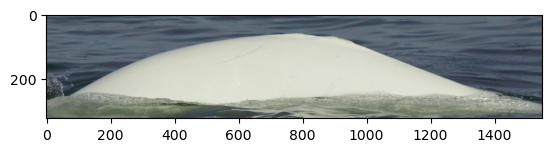

In [6]:
plt.imshow(all_images[1][0].permute(1, 2, 0).numpy())

Matplotlib is more intuitive than python indexing for viewing the image.

The python indexing approach prints the shape (dimensions) of a specific image as a NumPy array.

The matplotlib approach displays the image after reordering its dimensions to the format expected by Matplotlib.

#### Apply a new transformation to the data that changes the color of the image - check out options here: https://docs.pytorch.org/vision/0.11/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

In [7]:
#specifying image file path
images = "/projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all"
##### ADD YOUR TRANSFORMATION HERE #####
transform = transforms.Compose([transforms.ToTensor(), transforms.ColorJitter(brightness=.5, hue=.3)])
#loading in images and applying transformation
all_images = datasets.ImageFolder(images, transform)
print(all_images)

Dataset ImageFolder
    Number of datapoints: 9492
    Root location: /projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all
    StandardTransform
Transform: Compose(
               ToTensor()
               ColorJitter(brightness=(0.5, 1.5), contrast=None, saturation=None, hue=(-0.3, 0.3))
           )


#### View the same image from above with BOTH python indexing and matplotlib

In [8]:
all_images[1][0]

tensor([[[0.3800, 0.3614, 0.3539,  ..., 0.3862, 0.3815, 0.3889],
         [0.3577, 0.3539, 0.3539,  ..., 0.3900, 0.3852, 0.3926],
         [0.3391, 0.3391, 0.3428,  ..., 0.3815, 0.3815, 0.3852],
         ...,
         [0.3465, 0.3354, 0.3443,  ..., 0.3650, 0.3565, 0.3528],
         [0.3354, 0.3391, 0.3666,  ..., 0.3836, 0.3825, 0.3788],
         [0.3391, 0.3428, 0.3704,  ..., 0.3836, 0.3900, 0.3937]],

        [[0.3233, 0.3047, 0.2973,  ..., 0.3530, 0.3493, 0.3567],
         [0.3010, 0.2973, 0.2973,  ..., 0.3567, 0.3530, 0.3604],
         [0.2824, 0.2824, 0.2861,  ..., 0.3493, 0.3493, 0.3530],
         ...,
         [0.3121, 0.3010, 0.3121,  ..., 0.3381, 0.3233, 0.3196],
         [0.3010, 0.3047, 0.3344,  ..., 0.3567, 0.3493, 0.3456],
         [0.3047, 0.3084, 0.3381,  ..., 0.3567, 0.3567, 0.3604]],

        [[0.4236, 0.4050, 0.3976,  ..., 0.4348, 0.4385, 0.4459],
         [0.4013, 0.3976, 0.3976,  ..., 0.4385, 0.4422, 0.4496],
         [0.3827, 0.3827, 0.3864,  ..., 0.4385, 0.4385, 0.

In [9]:
all_images[1][0].numpy().shape

(3, 324, 1550)

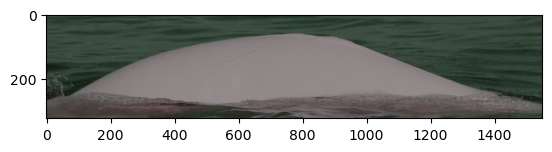

In [11]:
plt.imshow(all_images[1][0].permute(1,2,0).numpy())

#### Describe how your image changed with the transformation. Did the values change? Did the tensor/image size change? How does the image look?

The image looks darker.

#### Apply a transformation to the data that crops the image - check out options here: https://docs.pytorch.org/vision/0.11/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

In [12]:
#specifying image file path
images = "/projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all"
##### ADD YOUR TRANSFORMATION HERE #####
transform = transforms.Compose([transforms.ToTensor(), transforms.CenterCrop(250)])
#loading in images and applying transformation
all_images = datasets.ImageFolder(images, transform)
print(all_images)

Dataset ImageFolder
    Number of datapoints: 9492
    Root location: /projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all
    StandardTransform
Transform: Compose(
               ToTensor()
               CenterCrop(size=(250, 250))
           )


#### View the same image from above with BOTH python indexing and matplotlib

In [13]:
all_images[1][0]

tensor([[[0.3686, 0.3686, 0.3765,  ..., 0.3294, 0.3294, 0.3373],
         [0.3569, 0.3647, 0.3765,  ..., 0.3490, 0.3490, 0.3529],
         [0.3765, 0.3725, 0.3804,  ..., 0.3529, 0.3569, 0.3608],
         ...,
         [0.6275, 0.6078, 0.6275,  ..., 0.6118, 0.6078, 0.5961],
         [0.6627, 0.6392, 0.6549,  ..., 0.5647, 0.5686, 0.5765],
         [0.6588, 0.6510, 0.6745,  ..., 0.5333, 0.5020, 0.5059]],

        [[0.4157, 0.4157, 0.4235,  ..., 0.3765, 0.3765, 0.3843],
         [0.3961, 0.4039, 0.4157,  ..., 0.3961, 0.3961, 0.4000],
         [0.4157, 0.4118, 0.4196,  ..., 0.4000, 0.4039, 0.4078],
         ...,
         [0.6431, 0.6235, 0.6431,  ..., 0.6392, 0.6353, 0.6235],
         [0.6784, 0.6549, 0.6706,  ..., 0.5922, 0.5961, 0.6039],
         [0.6745, 0.6667, 0.6902,  ..., 0.5608, 0.5294, 0.5333]],

        [[0.4627, 0.4627, 0.4706,  ..., 0.4392, 0.4392, 0.4471],
         [0.4431, 0.4510, 0.4627,  ..., 0.4588, 0.4588, 0.4627],
         [0.4627, 0.4588, 0.4667,  ..., 0.4627, 0.4667, 0.

In [14]:
all_images[1][0].numpy().shape

(3, 250, 250)

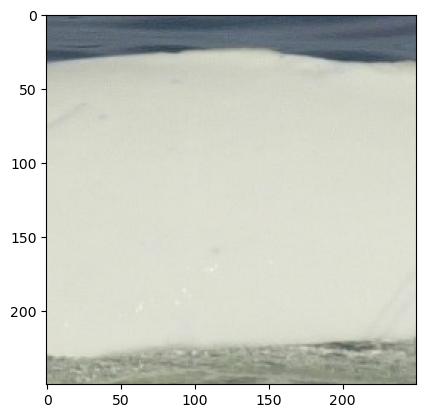

In [15]:
plt.imshow(all_images[1][0].permute(1,2,0).numpy())

#### Describe how your image changed with the transformation. Did the values change? Did the tensor/image size change? How does the image look?

The image is way more zoomed in. 

#### Look through the dataset, are all of the pictures the same size?

In [16]:
print(all_images[1][0].numpy().shape)
print(all_images[2][0].numpy().shape)
print(all_images[3][0].numpy().shape)
print(all_images[4][0].numpy().shape)

(3, 250, 250)
(3, 250, 250)
(3, 250, 250)
(3, 250, 250)


Yes, all the pictures are now the same.

#### Determine an image transformation approach that would give you optimal input images for a machine learning whale species classifier

You want: 
- All images converted to numerics
- All images to be the same size
- A data normalization approach
- Data augmentation

Make sure you visualize a few images to make sure your chosen approach was successful!

In [17]:
#specifying image file path
images = "/projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all"
##### ADD YOUR TRANSFORMATION HERE #####
transform = transforms.Compose([transforms.ToTensor()])
#loading in images and applying transformation
all_images = datasets.ImageFolder(images, transform)
print(all_images)

Dataset ImageFolder
    Number of datapoints: 9492
    Root location: /projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all
    StandardTransform
Transform: Compose(
               ToTensor()
           )
